# EcoFOCIpy ADCP QC - 21BSP-2A

- mostly remove >100 cm/s flows in u/v


In [1]:
import xarray as xa
import numpy as np

import matplotlib.pyplot as plt


In [2]:
xdf = xa.load_dataset('21ckp2a_0034m.nc')

In [3]:
xdf =xdf.where(xdf.u_curr_comp <=100,np.nan)
xdf

<xarray.Dataset>
Dimensions:          (latitude: 1, longitude: 1, time: 8134, depth: 15)
Coordinates:
  * time             (time) datetime64[ns] 2021-11-15 ... 2022-10-19T21:00:00
  * depth            (depth) float64 -28.0 -24.0 -20.0 -16.0 ... 20.0 24.0 28.0
  * latitude         (latitude) float64 71.22
  * longitude        (longitude) float64 -164.2
Data variables:
    u_curr_comp      (latitude, longitude, time, depth) float64 22.82 ... nan
    v_curr_comp      (latitude, longitude, time, depth) float64 -17.78 ... nan
    w_curr_comp      (latitude, longitude, time, depth) float64 2.1 0.3 ... nan
    w_curr_comp_err  (latitude, longitude, time, depth) float64 nan 1.1 ... nan
    agc1             (latitude, longitude, time, depth) float64 49.0 ... nan
    agc2             (latitude, longitude, time, depth) float64 48.0 ... nan
    agc3             (latitude, longitude, time, depth) float64 48.0 ... nan
    agc4             (latitude, longitude, time, depth) float64 47.0 ... nan
Attributes:
    Latitude_DegMMddW:                      71 13.115 N
    Longitude_DegMMddN:                     164 14.998 W
    MooringID:                              21CKP-2A
    platform_deployment_date:               2021-11-11T08:00:00Z
    platform_deployment_cruise_name:        SKQ202115S
    platform_recovery_date:                 2022-10-15T20:00:00Z
    platform_recovery_cruise_name:          
    platform_deployment_recovery_comments:  Nephyl on RCM not connected, only...
    WaterDepth:                             44.0
    date_created:                           2022-11-29T15:48:09Z
    date_modified:                          
    QC_indicator:                           unknown

In [4]:
# xdf['history'] = xdf.history + 'QC of high u/v values'

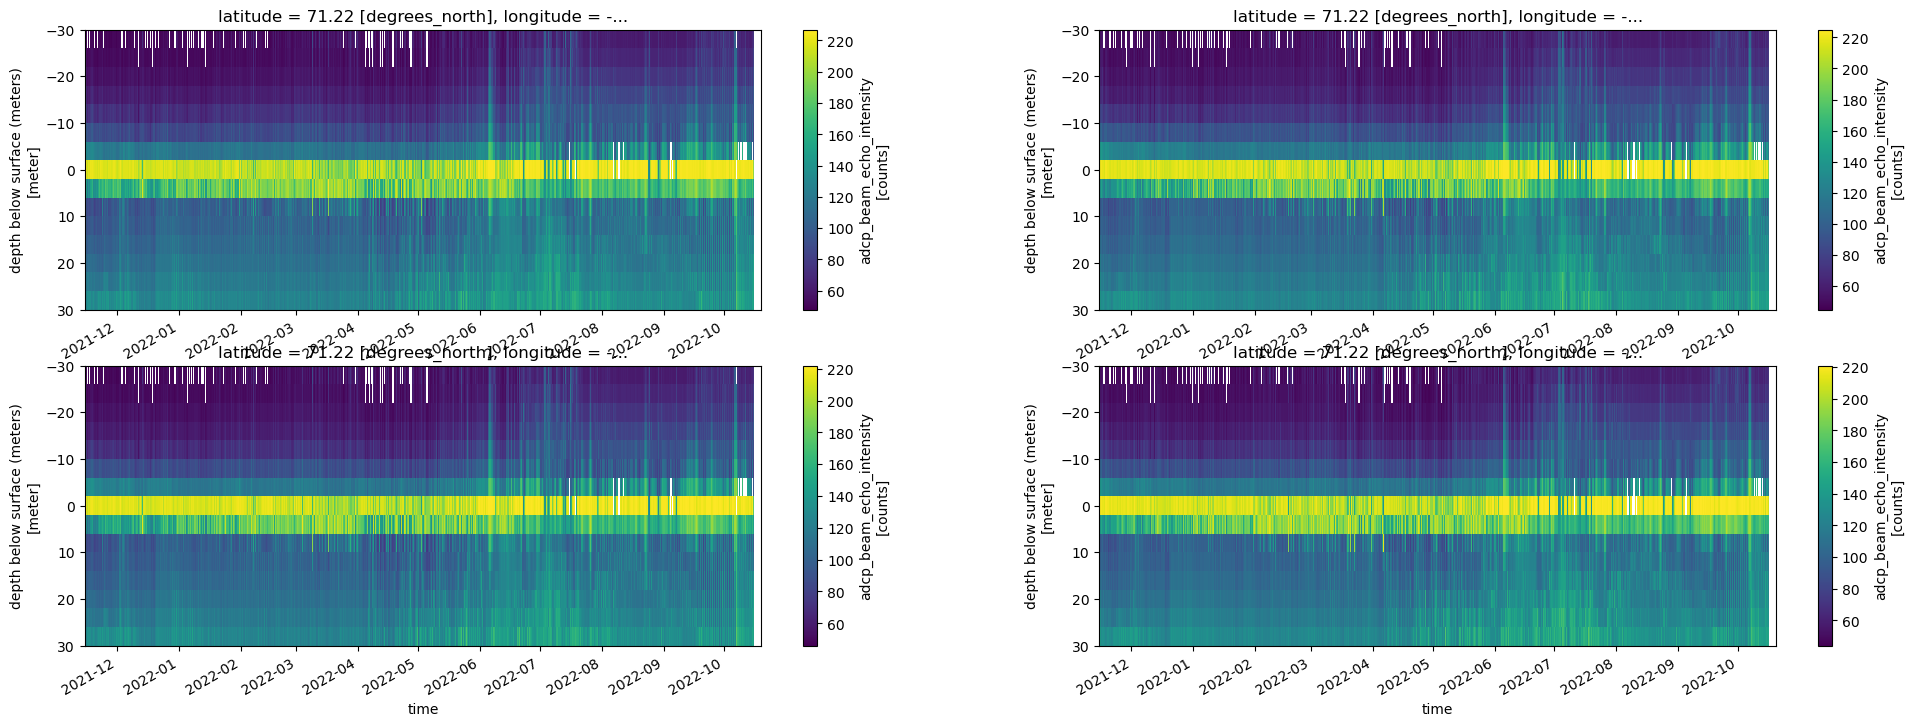

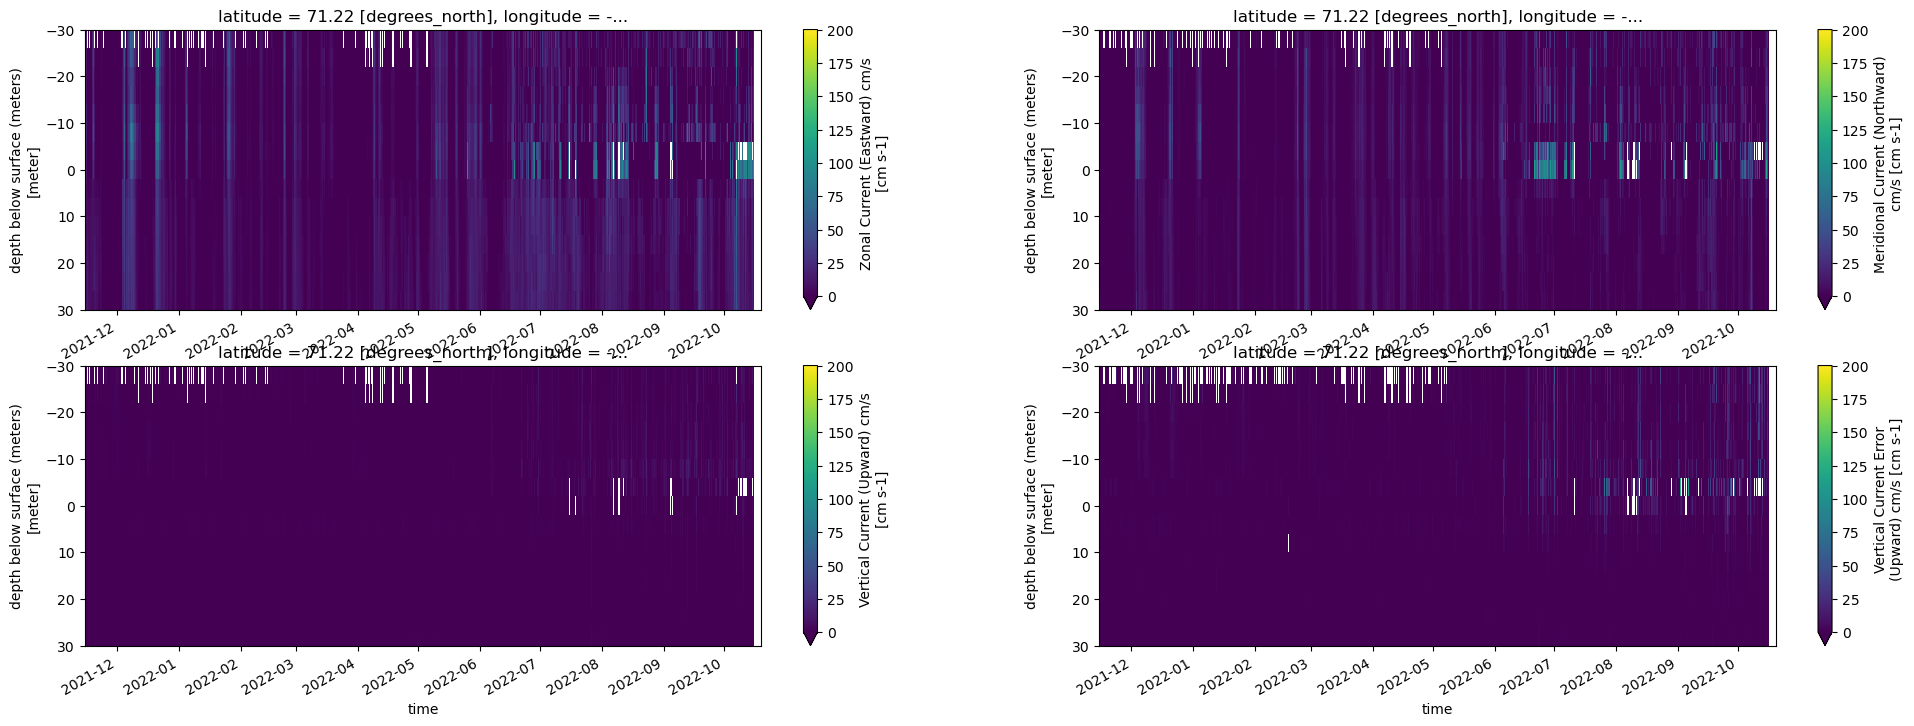

In [5]:
#optional plotting

fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(24,8))
try:
    xdf['agc1'].T.plot(ax=axes[0,0], yincrease=False)
    xdf['agc2'].T.plot(ax=axes[0,1], yincrease=False)
    xdf['agc3'].T.plot(ax=axes[1,0], yincrease=False)
    xdf['agc4'].T.plot(ax=axes[1,1], yincrease=False)
except:
    pass

fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(24,8))
try:
    xdf['u_curr_comp'].T.plot(ax=axes[0,0],vmin=0, vmax=200, yincrease=False)
    xdf['v_curr_comp'].T.plot(ax=axes[0,1],vmin=0, vmax=200, yincrease=False)
    xdf['w_curr_comp'].T.plot(ax=axes[1,0],vmin=0, vmax=200, yincrease=False)
    xdf['w_curr_comp_err'].T.plot(ax=axes[1,1],vmin=0, vmax=200, yincrease=False)
except:
    pass

In [6]:
try:
    xdf.attrs['history'] = xdf.attrs['history']+'  removed U,V >100cm/s'
except:
    xdf.attrs['history'] = '  removed U,V >100cm/s'    

## Trim above surface (negative values)

In [7]:
ixdf = xdf.where(xdf.depth >=-0.).dropna(how='all',dim='depth')

In [8]:
ixdf.attrs['history'] = ixdf.attrs['history']+'  trimmed above surface'

In [9]:
ixdf.to_netcdf('21ckp2a_0034m.trimmed.nc')

In [10]:
xdf = xa.load_dataset('21ckp2a_0034m.trimmed.nc')

In [11]:
ixdf = xdf.interpolate_na(dim='time',max_gap='2H')

In [12]:
ixdf.attrs['history'] = ixdf.attrs['history']+'  linearly interpolated 1hour gaps'

## Interpolate over singleton missing gaps linearly

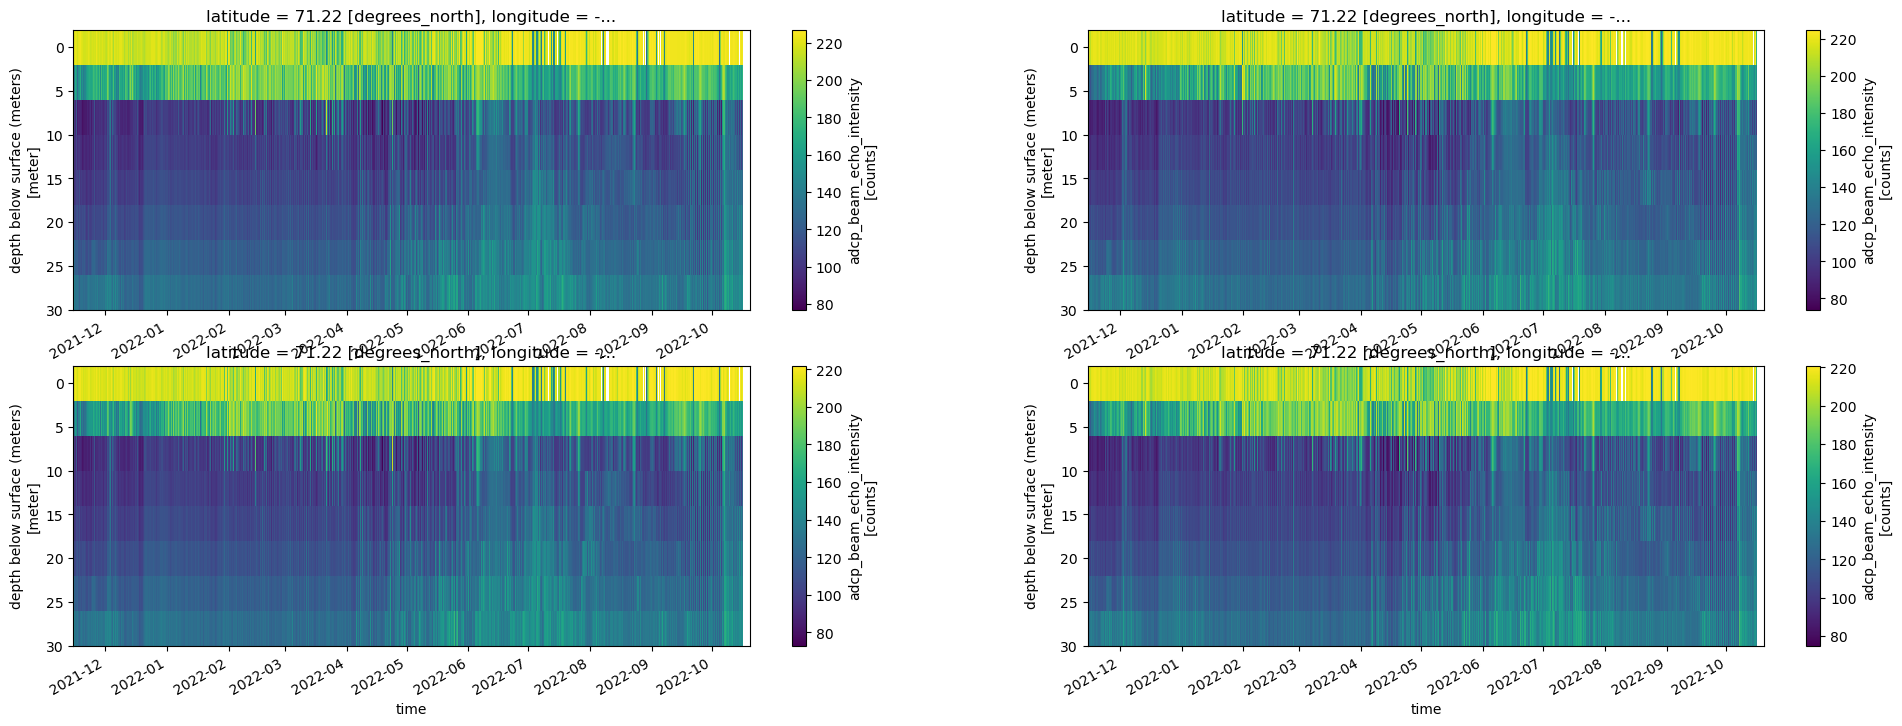

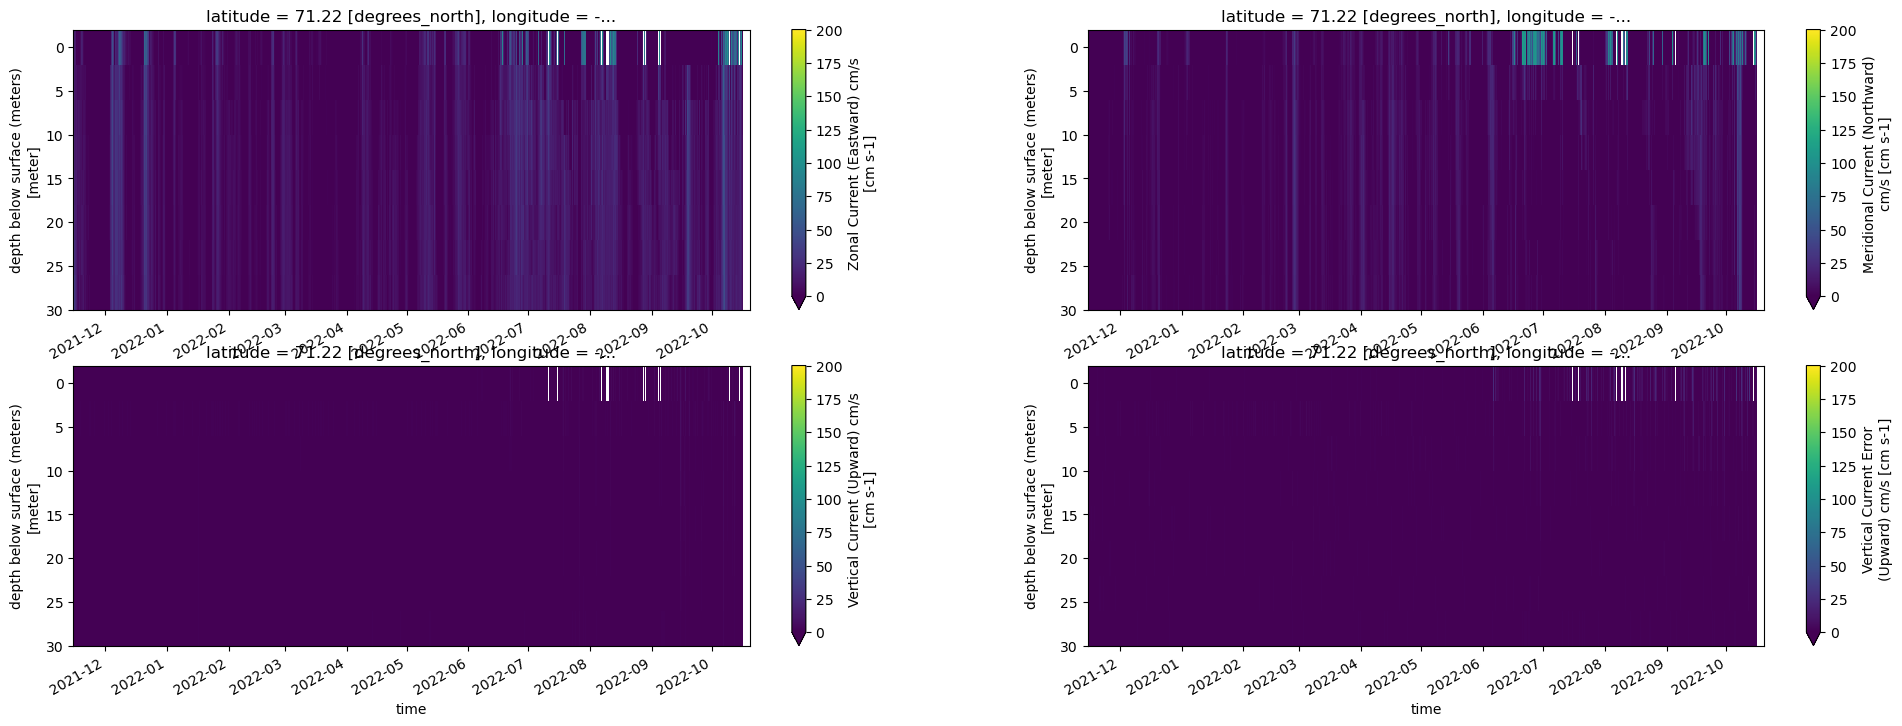

In [13]:

fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(24,8))
try:
    ixdf['agc1'].T.plot(ax=axes[0,0], yincrease=False)
    ixdf['agc2'].T.plot(ax=axes[0,1], yincrease=False)
    ixdf['agc3'].T.plot(ax=axes[1,0], yincrease=False)
    ixdf['agc4'].T.plot(ax=axes[1,1], yincrease=False)
except:
    pass

fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(24,8))
try:
    ixdf['u_curr_comp'].T.plot(ax=axes[0,0],vmin=0, vmax=200, yincrease=False)
    ixdf['v_curr_comp'].T.plot(ax=axes[0,1],vmin=0, vmax=200, yincrease=False)
    ixdf['w_curr_comp'].T.plot(ax=axes[1,0],vmin=0, vmax=200, yincrease=False)
    ixdf['w_curr_comp_err'].T.plot(ax=axes[1,1],vmin=0, vmax=200, yincrease=False)
except:
    pass

In [14]:
ixdf.to_netcdf('21ckp2a_0034m.filtered.nc')